<a href="https://colab.research.google.com/github/ZoubirCHATTI/08_Machin_Learning/blob/main/03_MNIST_images_classification/02_MNIST_CNN_SEQUENTIAL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
#Loading data
(train_data, train_labels), (test_data, test_labels)=mnist.load_data()

In [16]:
#Reshaping the data
X_train=train_data.reshape(-1, 28, 28, 1)
X_test=test_data.reshape(-1, 28, 28, 1)

In [21]:
#Normalization of pixel intensities
X_train=X_train/X_train.max()
X_test=X_test/X_test.max()

In [48]:
#Defining a function that binarizes the output labels
def to_one_hot(sequence, dimension):
  res=np.zeros((len(sequence), dimension))
  for i, seq in enumerate(sequence):
    res[i ,  seq]=1
  return res

In [49]:
#Vectorizing labels
Y_train=to_one_hot(train_labels, 10)
Y_test=to_one_hot(test_labels, 10)

label: 5


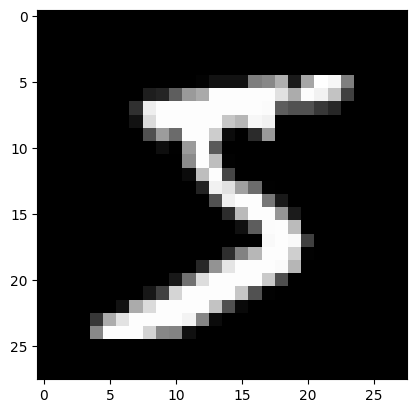

In [24]:
#Displaying sample image from the training dataset
plt.imshow(X_train[0], cmap='gray')
print("label:", train_labels[0])

In [65]:
#Convolutional model creation
model=Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(8, (3 , 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3 , 3), activation='relu'))
model.add(MaxPooling2D(2 , 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [67]:
#Model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Defining stop condition
early_stopping=EarlyStopping(monitor='val_loss', patience=2)

In [68]:
#Runing model training
history=model.fit(X_train, Y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping], batch_size=512)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 202ms/step - accuracy: 0.2931 - loss: 0.4003 - val_accuracy: 0.8652 - val_loss: 0.1143
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.8802 - loss: 0.0926 - val_accuracy: 0.9379 - val_loss: 0.0493
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.9365 - loss: 0.0475 - val_accuracy: 0.9561 - val_loss: 0.0339
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - accuracy: 0.9567 - loss: 0.0334 - val_accuracy: 0.9647 - val_loss: 0.0273
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.9646 - loss: 0.0266 - val_accuracy: 0.9688 - val_loss: 0.0227
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.9691 - loss: 0.0226 - val_accuracy: 0.9739 - val_loss: 0.0204
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - accuracy: 0.9749 - loss: 0.0191 - val_accuracy: 0.9756 - val_loss: 0.0183
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.9771 - loss: 0.0169 - val_accu

In [69]:
#Model evaluation
loss, accuracy=model.evaluate(X_test, Y_test)
print("loss:", loss)
print("accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9774 - loss: 0.0154
loss: 0.013136488385498524
accuracy: 0.9807999730110168


In [70]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,600 (631.25 KB)

 Trainable params: 53,866 (210.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,734 (420.84 KB)

In [81]:
 history_dict=history.history
 train_loss=history_dict['loss']
 val_loss=history_dict['val_loss']
 train_acc=history_dict['accuracy']
 val_acc=history_dict['val_accuracy']
 epoch=range(1, len(train_loss)+1)

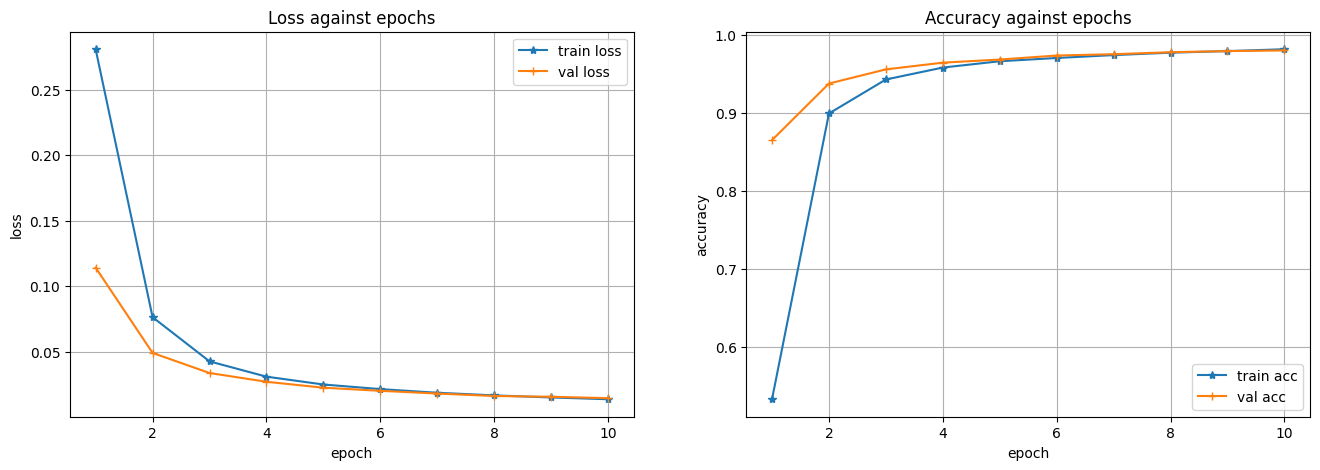

In [82]:
#Plotting different evaluation parameters
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch, train_loss,marker='*', label='train loss')
plt.plot(epoch, val_loss,marker='+', label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss against epochs')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(epoch, train_acc, marker='*', label='train acc')
plt.plot(epoch, val_acc, marker='+', label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy against epochs')
plt.legend()
plt.grid(True)
plt.show()